In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer





In [4]:
count = CountVectorizer()

data = pd.read_csv("/content/sample_data/Train.csv")

In [14]:
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


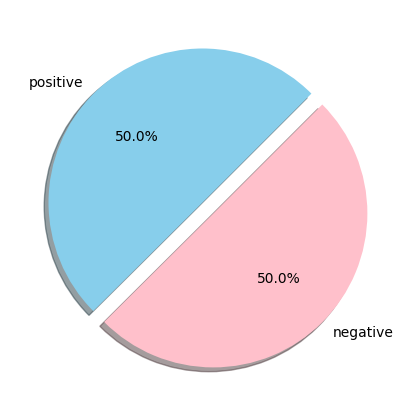

In [6]:
#visualize the dataset

fig= plt.figure(figsize=(5,5))
colors= ["skyblue" , "pink"]

pos = data[data["label"]==1]
neg = data[data["label"]==0]

ck=[pos["label"].count() , neg["label"].count()]
legpie = plt.pie( ck ,labels=["positive","negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))


In [9]:
#the code performs text preprocessing by removing HTML tags, extracting emojis,
# removing non-word characters, converting the text to lowercase, and updating the 'text' column in the 'data' dataframe with the preprocessed text.
import re
 
def preprocessing(text):
  text = re.sub('<[^>*]>'," ", text)
  emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
  return text   

data['text']=data['text'].apply(preprocessing)



In [10]:
# nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenize(text):
  return text.split()

def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


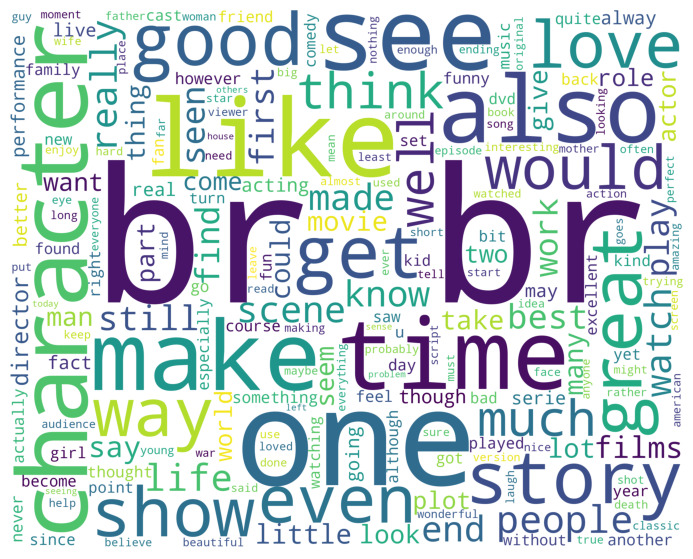

Negative words are as follows


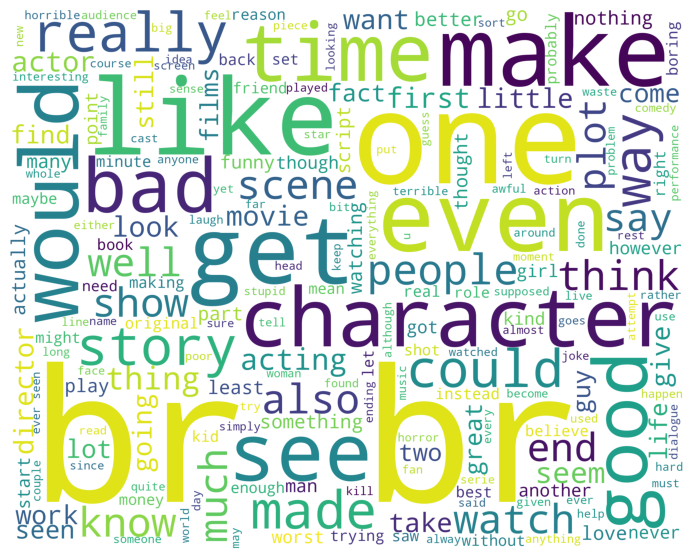

In [13]:
#Visulaize Positive and Negative word using WordCloud

#remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop= stopwords.words("english")

#Visulaize Positive and Negative word using WordCloud
from wordcloud import WordCloud

positive_words  =data[data['label']==1]
positive_words = positive_words['text']

negative_words  =data[data['label']==0]
negative_words = negative_words['text']

def wordcloud_draw(data ,color='white'):
  words = ' '.join(data)
  cleaned_words = ' '.join([word for word in words.split() 
                      if (word!='movie' and word!='film')])


  wordcloud  = WordCloud(stopwords=stop ,background_color = color , width=2500 ,height = 2000 ).generate(cleaned_words)

  plt.figure(1,figsize=(10, 7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positive_words,'white')
print("Negative words are as follows")
wordcloud_draw(negative_words)

              

In [15]:
from sklearn.feature_extraction.text import  TfidfVectorizer

tfidf= TfidfVectorizer(strip_accents = None , lowercase=False , preprocessor= None ,
                       tokenizer = tokenizer_porter , use_idf =True ,norm='l2' , smooth_idf=True)

y=data.label.values

x= tfidf.fit_transform(data.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
#Training

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [20]:
#Train model using logisticRegression Model

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

clf  = LogisticRegressionCV(cv = 6 , scoring='accuracy' , random_state=0 , max_iter = 500).fit(X_train , y_train)

preds = clf.predict(X_test)

#Accuracy 
print("Accuracy = ",metrics.accuracy_score(y_test , preds))

Accuracy =  0.89135
